## Análisis de Datos de Crédito Bancario

El notebook tiene como objetivo analizar un conjunto de datos que contiene información sobre clientes de una institución financiera para comprender patrones en su comportamiento de crédito y pago. Este análisis sirve como un primer paso para preparar los datos de cara a futuros modelos predictivos, como la identificación de clientes que podrían incumplir sus pagos.

El principal propósito del notebook es explorar y limpiar el conjunto de datos para garantizar que esté listo para un análisis más avanzado o la construcción de modelos de machine learning. Además, se busca extraer insights clave que permitan entender el perfil de los clientes y los factores que influyen en su comportamiento financiero y la probabilidad de pagar o no un credito.

**Autor:** isaias perez sarmiento

In [1]:
# Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlp
import seaborn as sns
import plotly.express as px

In [2]:
#subimos nuestros datos desde el ordenador
data = pd.read_excel('C:/Users/isape/OneDrive/Documentos/Panda/default_credit_card_clients.xls')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Información de las distintas columnas:
ID: El ID de la cuenta
LIMIT_BAL: Cantidad del credito dado (En nuevos dólares Taiwaneses (NT)) incluyendo el credito individual y familiar (suplementario)

SEX: 1 = hombre; 2 = mujer

EDUCATION: 1 = graduate school (Escuela de posgrado); 2 = university (Universidad); 3 = high school (Escuela secundaria); 4 = others (Otro)

MARRIAGE: Estado marital (1 = casado; 2 = soltero; 3 = otro)

AGE: Edad

PAY_1 - PAY_6: Historial de pagos pasados. 
Historial desde Abril hasta Septiembre.

La escala de calificación es de la siguiente forma: -2 = Comienzo del mes con balance cero, y nunca ha usado ningún credito;-1 = Pagar debidamente; 0 = pago mínimo hecho; 1 = Pago atrasado por un mes; 2 = Pago atrasado por dos meses; y así hasta el valor 9 = pago atrasado por nueve meses y más

BILL_AMT1 - BILL_AMT6: Monto de la factura a pagar. BILL_AMT1 representa la cantidad del recibo en Septiembre hasta BILL_AMT7 representa la cantidad del recibo en Abril.

PAY_AMT1 - PAY_AMT6: Monto del pago previo (dólares NT).

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [4]:
# La columna ID debe tener valores unico, segumos a corroborar esta informacion 
data['ID'].nunique()

29687

In [5]:
id_counts = data['ID'].value_counts()    #Vemos que hay informacion repetida en la columna ID, seguimos a ver cuales datos son:
id_counts[:5]     # Verificamos que los datos se repiten Max 2 veces

ID
ad23fe5c-7b09    2
1fb3e3e6-a68d    2
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
Name: count, dtype: int64

In [6]:
id_counts.value_counts() # 313 valores repetidos en la coumna ID

count
1    29374
2      313
Name: count, dtype: int64

In [7]:
# Utilizamos la Mascara booleana
bool_mask = id_counts == 2
bool_mask[:5]

ID
ad23fe5c-7b09    True
1fb3e3e6-a68d    True
89f8f447-fca8    True
7c9b7473-cc2f    True
90330d02-82d9    True
Name: count, dtype: bool

In [8]:
dups_ids = id_counts.index[bool_mask]
dups_ids[:5]

Index(['ad23fe5c-7b09', '1fb3e3e6-a68d', '89f8f447-fca8', '7c9b7473-cc2f',
       '90330d02-82d9'],
      dtype='object', name='ID')

In [9]:
data.loc[data['ID'].isin(dups_ids[:3]), :].head(6)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16727,1fb3e3e6-a68d,80000,1,2,2,33,2,2,0,0,...,27394,29922,31879,0,2000,2000,3000,2600,0,1
16827,1fb3e3e6-a68d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29685,ad23fe5c-7b09,50000,1,3,1,32,0,0,0,0,...,12882,8131,3983,3000,2871,1000,163,3983,3771,1
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Creamos una máscara para identificar valores cero en todas las columnas excepto 'ID
data_zero_mask = data == 0
data_zero_mask.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,False,True,False,False,False,True,False,False
2,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True


In [11]:
# Creamos una máscara para identificar las filas donde todos los valores excepto 'ID' son cero
row_zero_mask = data_zero_mask.iloc[:, 1:].all(axis=1) 

In [12]:
row_zero_mask

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool

In [13]:
# Contamos cuántas filas tienen todos los valores en cero
sum(row_zero_mask)

315

In [14]:
# Filtramos las filas que no tienen todos los valores en cero
data_clean_1 = data.loc[~row_zero_mask, :].copy()
data_clean_1.shape

(29685, 25)

In [15]:
# Verificamos que todos los IDs sean únicos después de la limpieza
data_clean_1['ID'].nunique()

29685

In [16]:
# Exploramos los valores únicos de la columna 'PAY_1'
data_clean_1['PAY_1'].value_counts()

PAY_1
0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: count, dtype: int64

In [17]:
valid_pay_1 = data_clean_1['PAY_1'] != 'Not available'
sum(valid_pay_1)

26664

In [18]:
# Creamos una máscara para filtrar los registros donde 'PAY_1' no sea "Not available"
data_clean_2 = data_clean_1.loc[valid_pay_1, :].copy()
data_clean_2.shape

(26664, 25)

In [19]:
data_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26664 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  object
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  int64 


In [20]:
# Convertimos la columna 'PAY_1' a tipo entero para facilitar el análisis
data_clean_2['PAY_1'] = data_clean_2['PAY_1'].astype('int64')
data_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


In [21]:
# Guardamos los datos limpios en un archivo CSV
data_clean_2.to_csv('./financial_data', index= False)

## Explorando el Historial Finaciero

In [22]:
# Cargamos nuevamente el archivo para asegurarnos de que se guardó correctamente
data = pd.read_csv('./financial_data')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [23]:
# miramos la cantidad de columnas y filas que tiene nuestra base de datos
data.shape

(26664, 25)

In [24]:
# obsevamos las columnas finales con las que trabajaremos en nuestro proyecto
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [25]:
pay_colmns=['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [26]:
data[pay_colmns].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [27]:
data[pay_colmns[0]].value_counts().sort_index()

PAY_1
-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: count, dtype: int64

<Axes: >

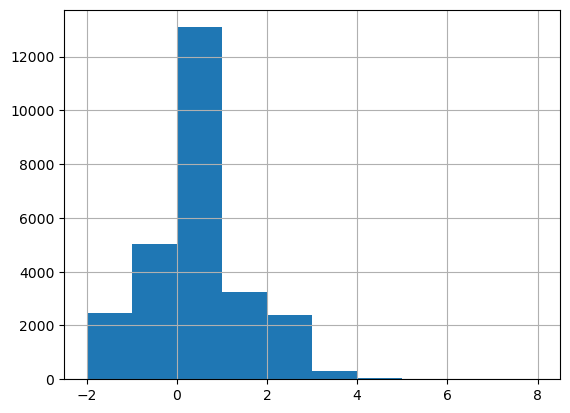

In [28]:
data[pay_colmns[0]].hist()

In [29]:
data['default payment next month'].value_counts()

default payment next month
0    20750
1     5914
Name: count, dtype: int64

array([[<Axes: title={'center': 'PAY_1'}>,
        <Axes: title={'center': 'PAY_2'}>,
        <Axes: title={'center': 'PAY_3'}>],
       [<Axes: title={'center': 'PAY_4'}>,
        <Axes: title={'center': 'PAY_5'}>,
        <Axes: title={'center': 'PAY_6'}>]], dtype=object)

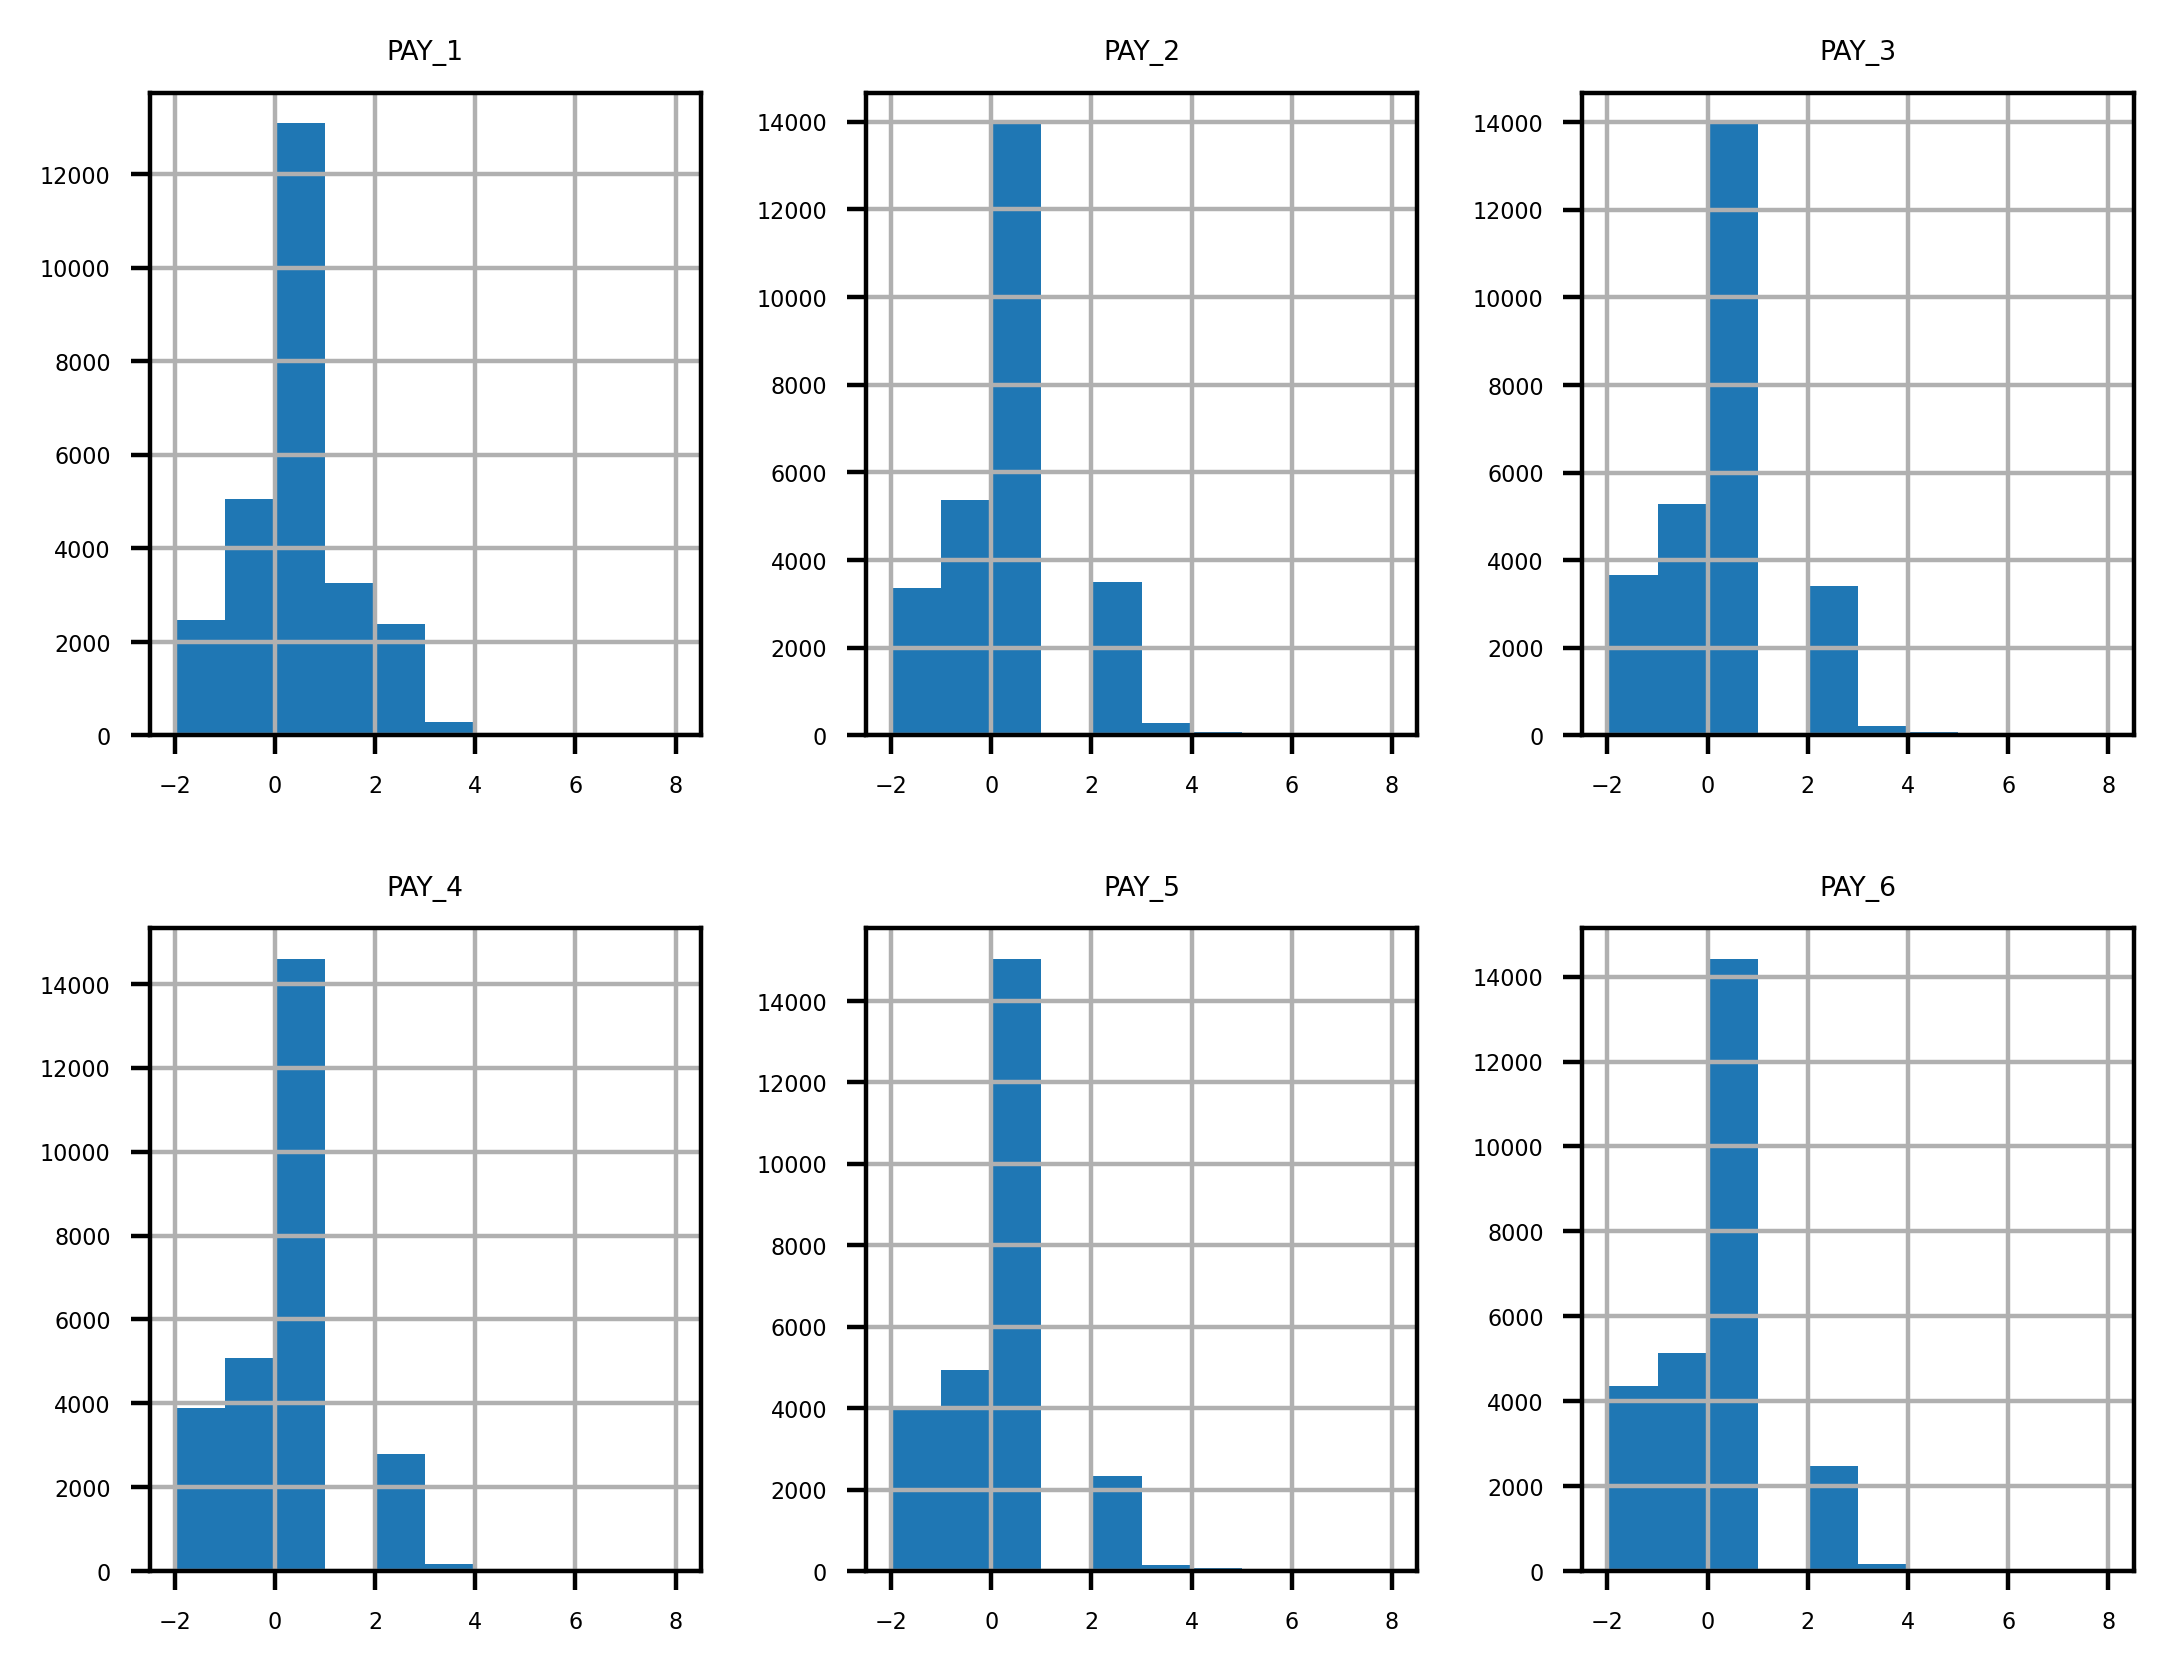

In [30]:
import matplotlib as mlp
mlp.rcParams['figure.dpi'] = 400 # Alta resolución
mlp.rcParams['font.size'] = 4
data[pay_colmns].hist(layout=(2, 3))

#### Distribución de PAY_0 (Estado de Pago Actual):

La mayoría de los clientes están al día (valor 0), algunos adelantan pagos (valores negativos), y una minoría presenta atrasos (valores positivos).
Conclusión: La mayoría cumple con sus pagos, pero los atrasos deben monitorearse.

#### Frecuencia de Incumplimiento (Default Payment Next Month):
0: Representa clientes que no incumplieron: 23,364.
1: Representa clientes que incumplieron: 6,636.

El 22% de los clientes incumplen, mientras que el 78% no lo hacen.
Conclusión: Aunque la mayoría paga a tiempo, el porcentaje de incumplimientos es relevante para analizar riesgos.

#### Estados de Pago en 6 Periodos (PAY_1 a PAY_6):

En todas las gráficas, la mayoría de los valores están en 0, lo que reafirma que los clientes suelen estar al día en sus pagos.
Hay valores negativos consistentes en cada período, posiblemente indicando pagos adelantados.
Los valores positivos, que reflejan retrasos, tienden a disminuir en frecuencia a medida que el retraso aumenta (es decir, menos clientes tienen retrasos mayores).
Las distribuciones son similares entre períodos, lo que podría indicar estabilidad en el comportamiento de los clientes.
Conclusión: Aunque la mayoría de los clientes están al día en sus pagos, un análisis de aquellos con retrasos recurrentes en múltiples períodos podría ayudar a identificar patrones de riesgo.

In [56]:
data.loc[data['PAY_2'] == 2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2


In [32]:

bill_feats = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt_feats = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [33]:
data[bill_feats].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


array([[<Axes: title={'center': 'BILL_AMT1'}>,
        <Axes: title={'center': 'BILL_AMT2'}>,
        <Axes: title={'center': 'BILL_AMT3'}>],
       [<Axes: title={'center': 'BILL_AMT4'}>,
        <Axes: title={'center': 'BILL_AMT5'}>,
        <Axes: title={'center': 'BILL_AMT6'}>]], dtype=object)

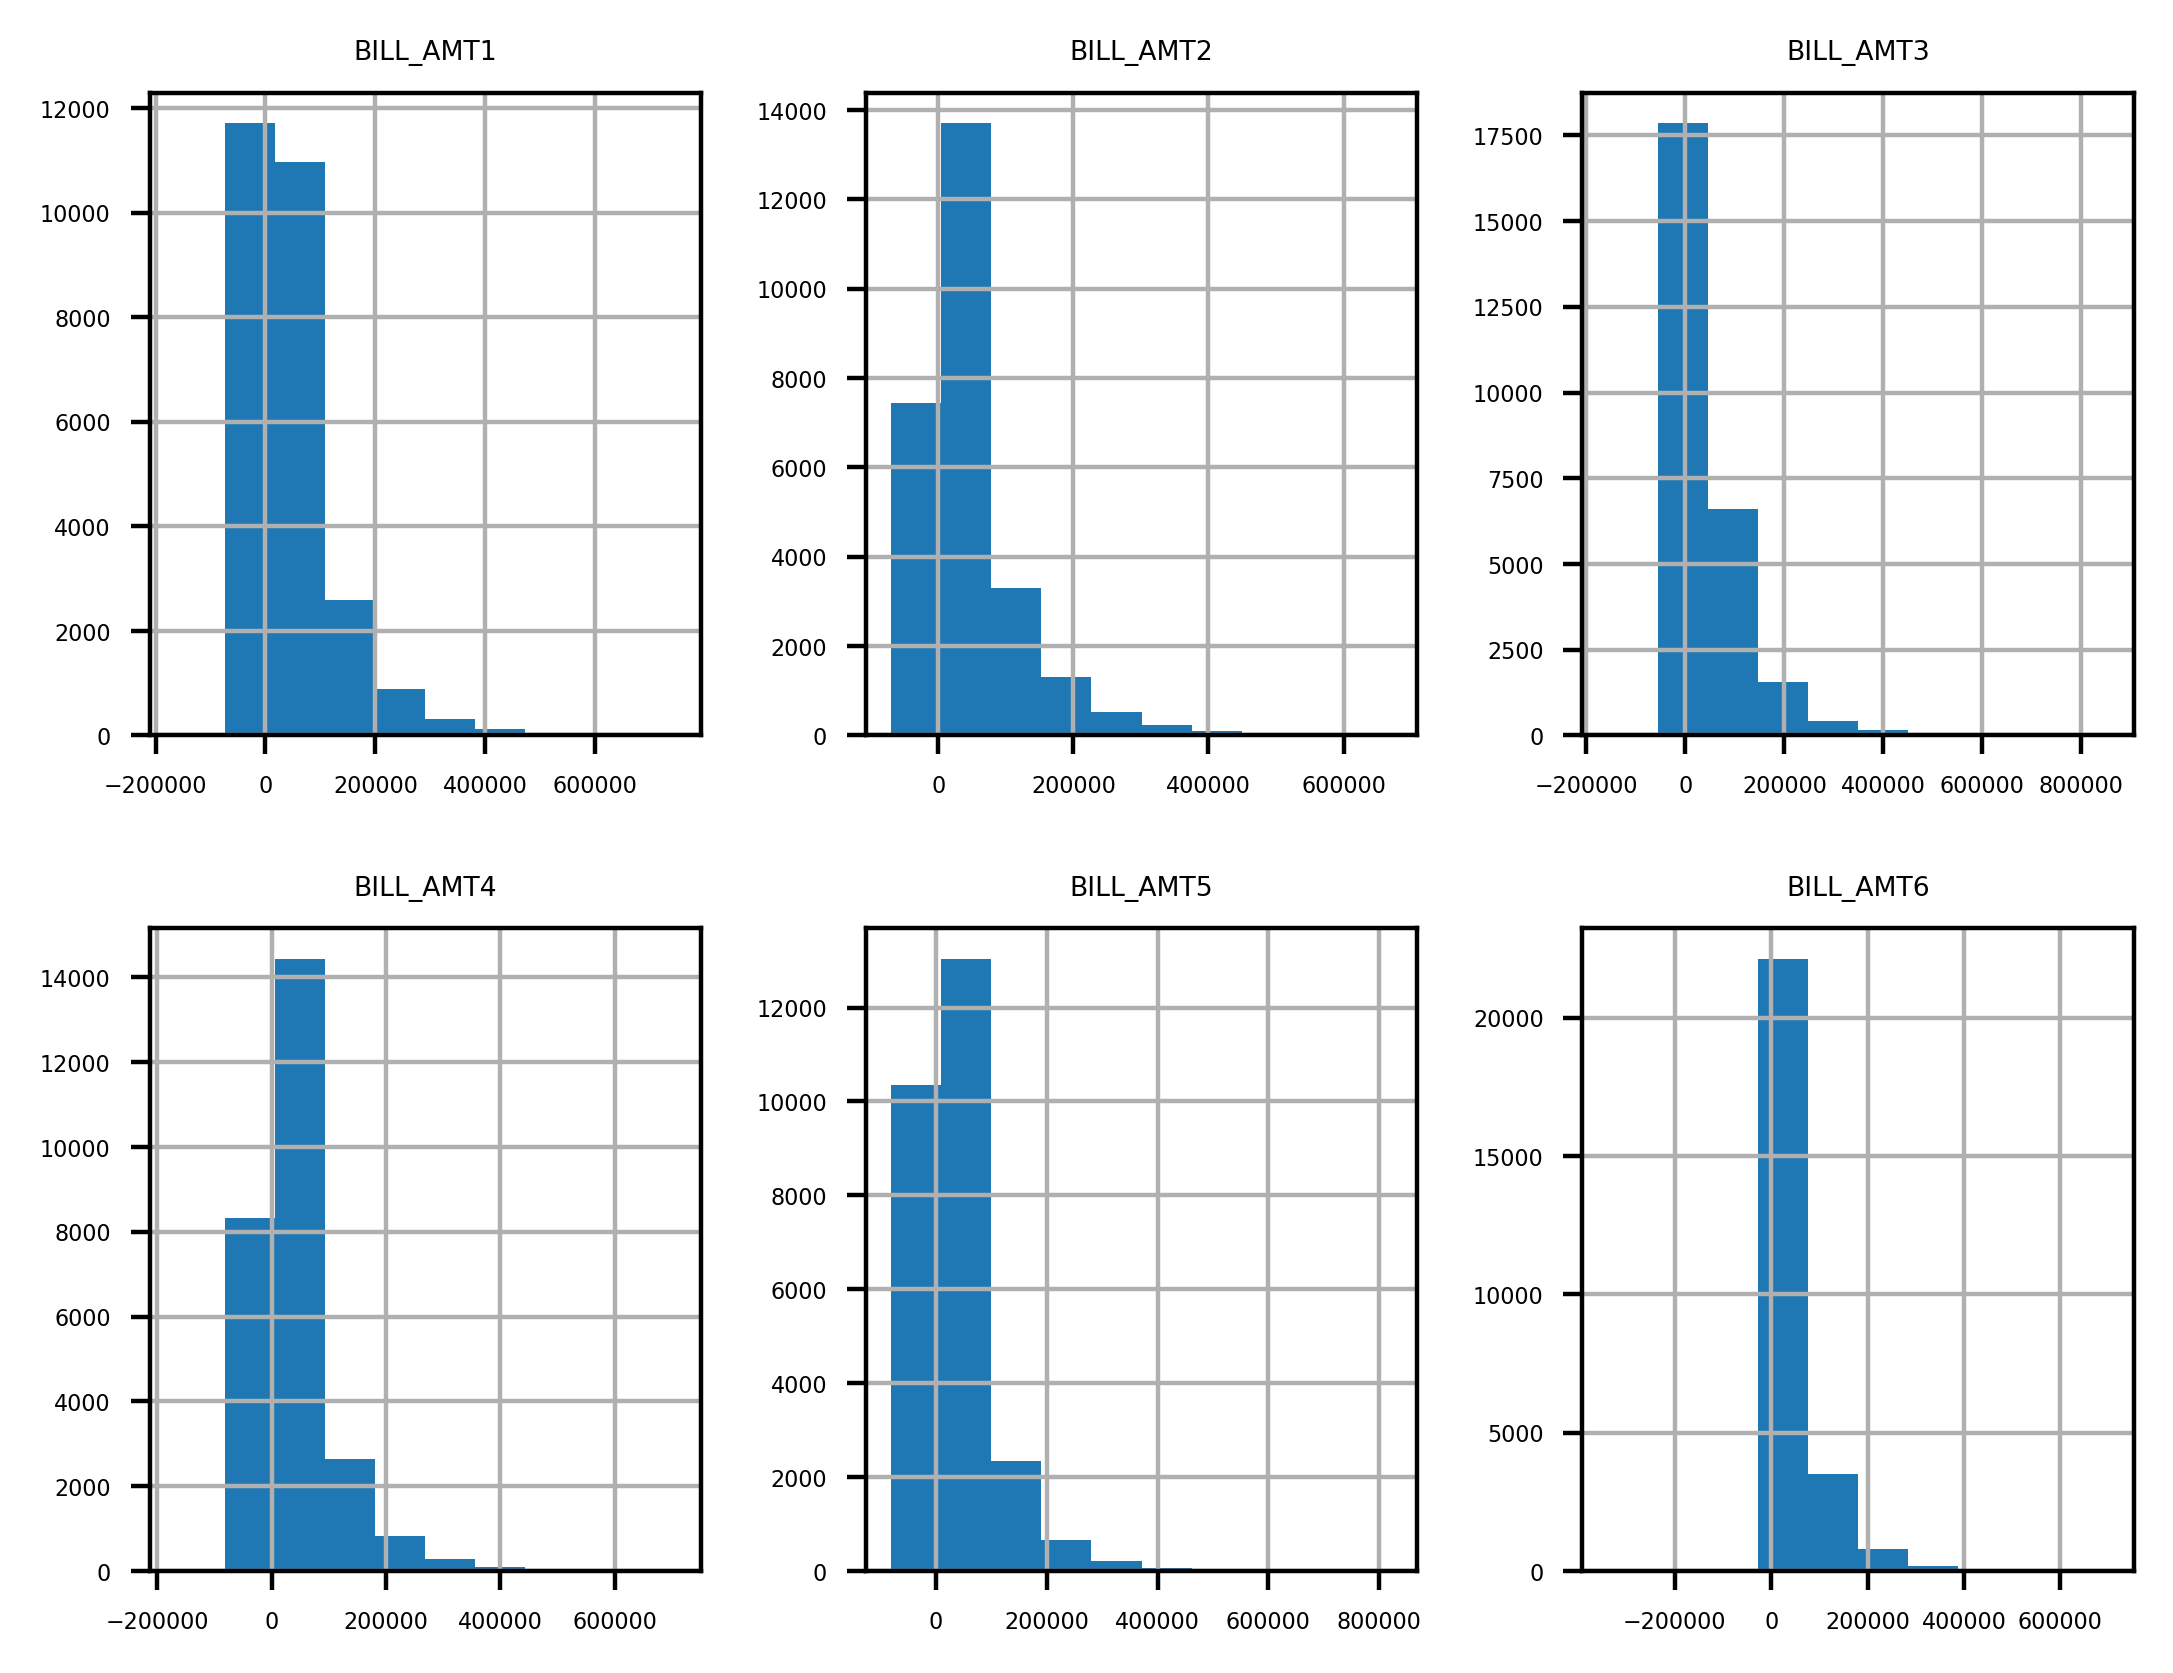

In [34]:
data[bill_feats].hist(layout=(2, 3))

array([[<Axes: title={'center': 'PAY_AMT1'}>,
        <Axes: title={'center': 'PAY_AMT2'}>,
        <Axes: title={'center': 'PAY_AMT3'}>],
       [<Axes: title={'center': 'PAY_AMT4'}>,
        <Axes: title={'center': 'PAY_AMT5'}>,
        <Axes: title={'center': 'PAY_AMT6'}>]], dtype=object)

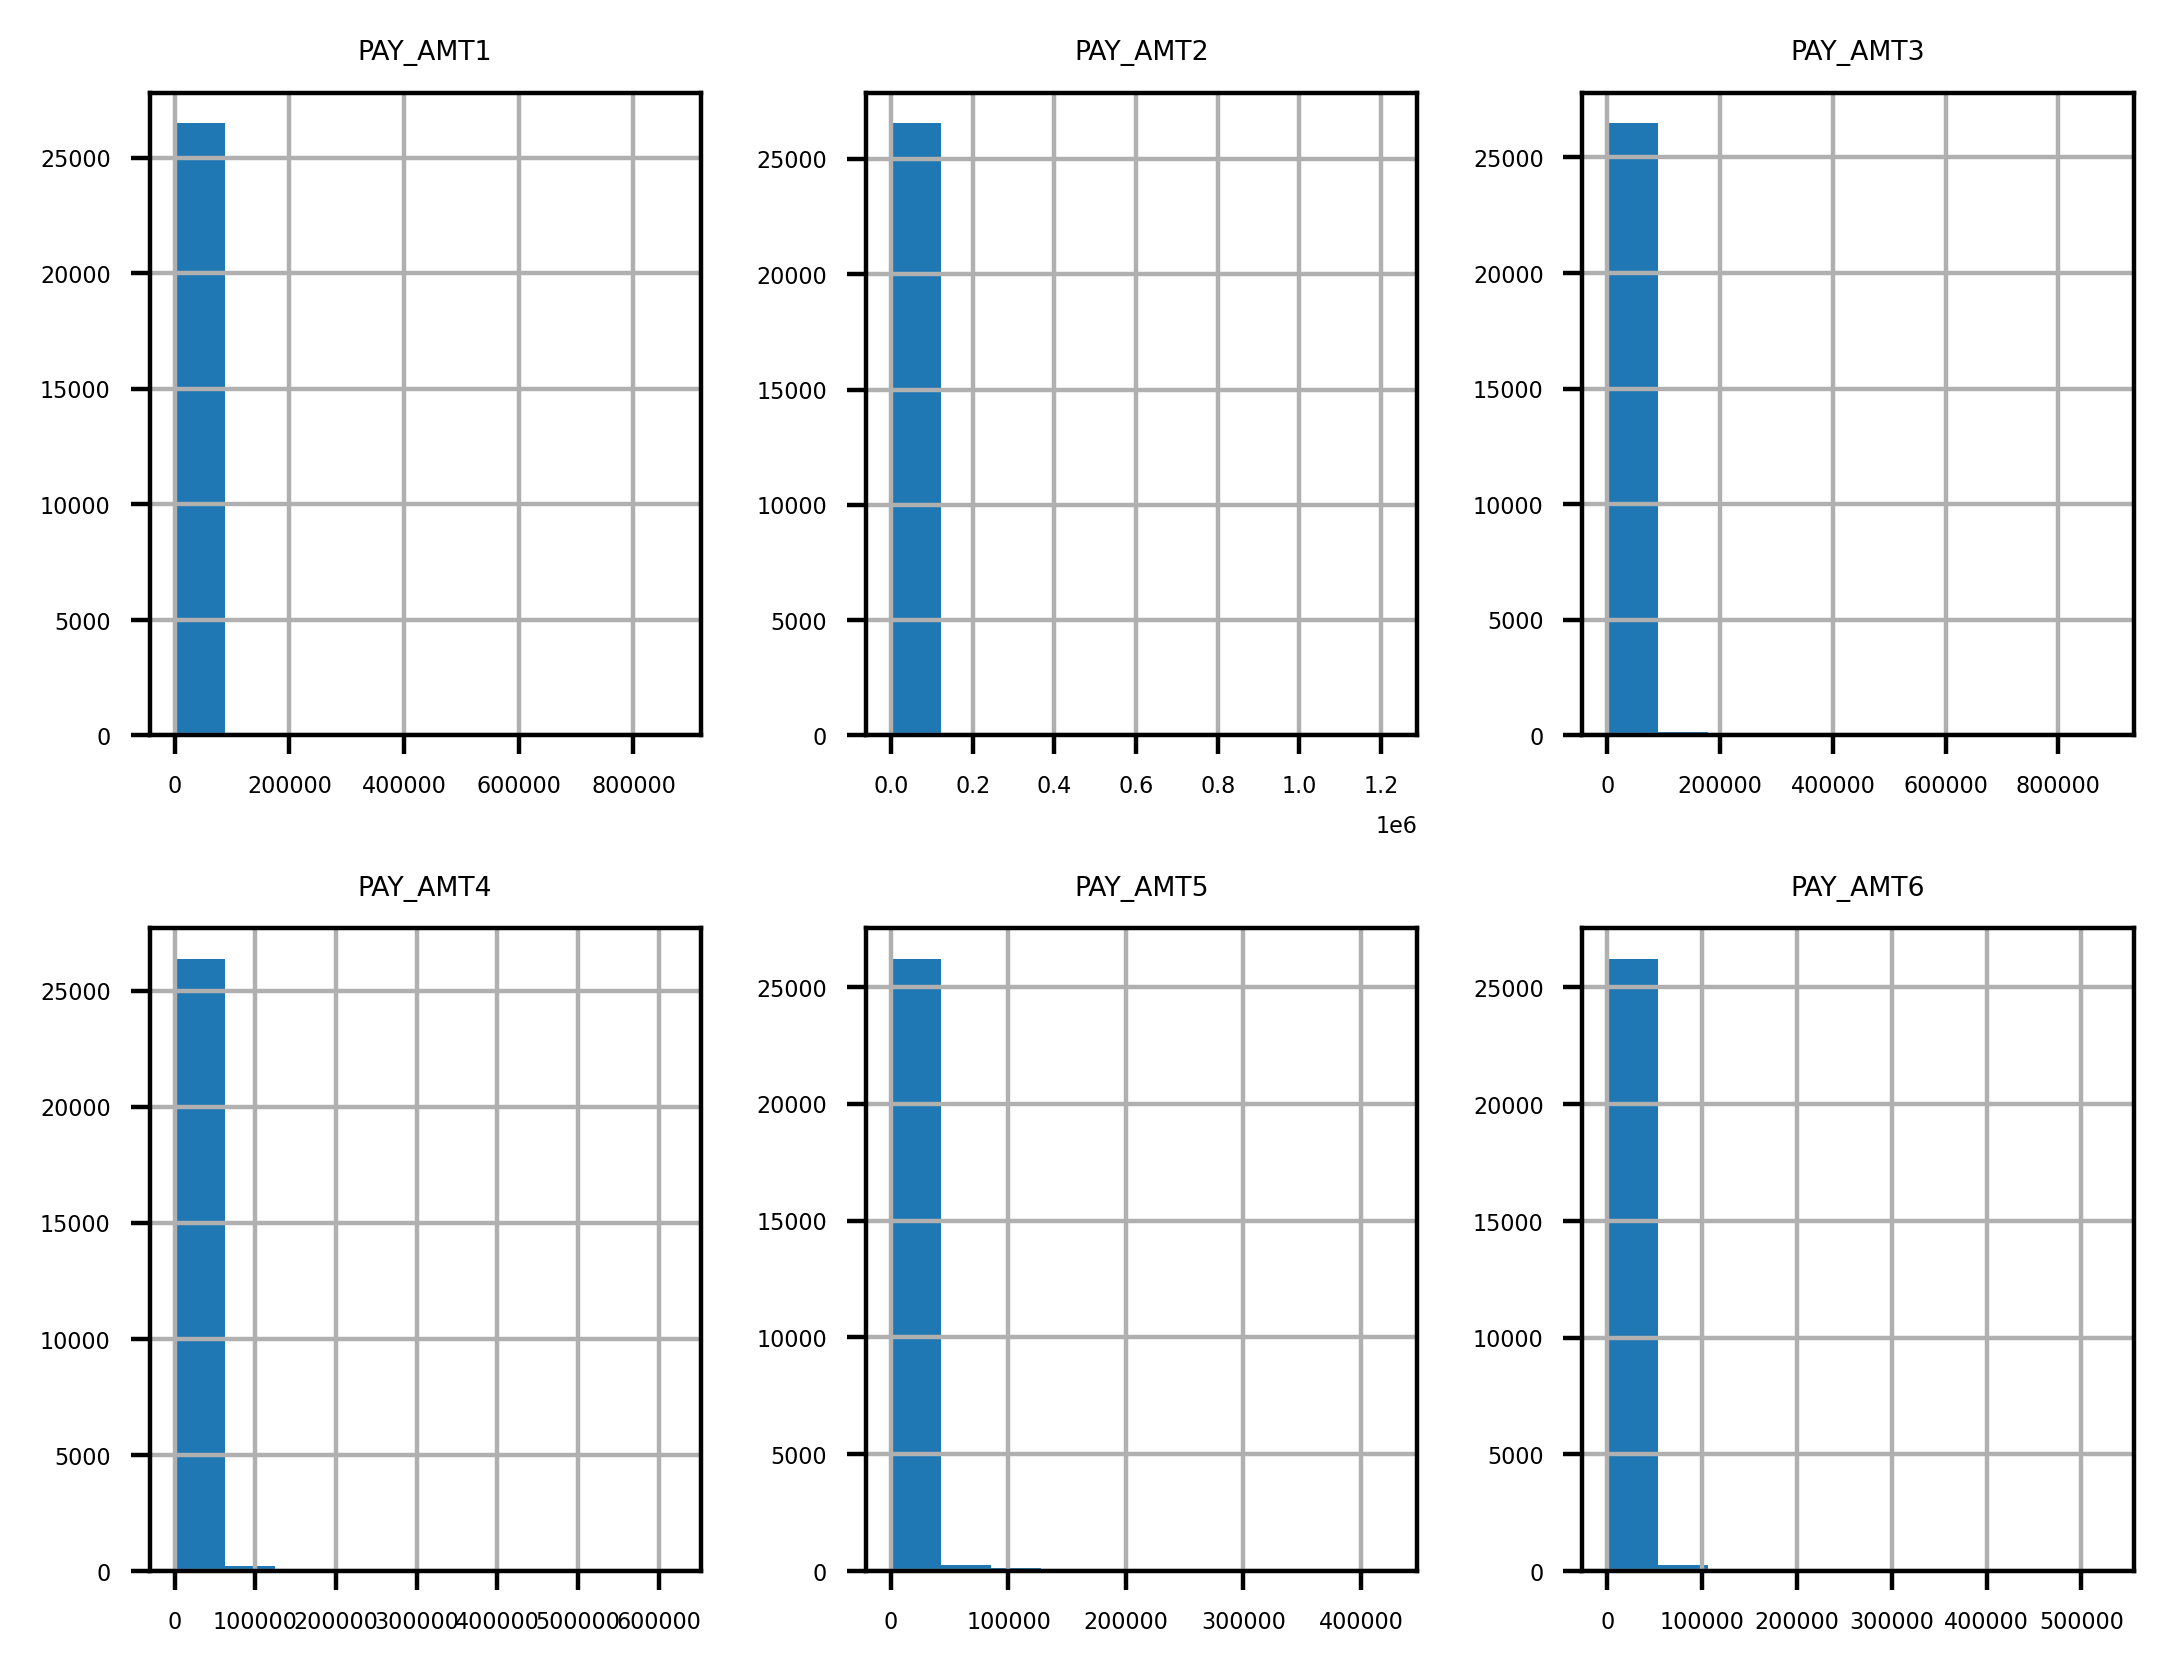

In [35]:
data[pay_amt_feats].hist(layout=(2, 3))

### BILL_AMT1 a BILL_AMT6 (Montos de Facturación):

Las distribuciones están sesgadas a la derecha, con la mayoría de los clientes teniendo montos de facturación bajos o moderados.
Pocos clientes presentan facturación elevada, con una tendencia consistente entre los seis periodos.

### PAY_AMT1 a PAY_AMT6 (Montos de Pago):

Las distribuciones también están concentradas en valores bajos, indicando que la mayoría de los clientes realizan pagos pequeños o moderados.
Los pagos altos son poco frecuentes pero están presentes de manera constante en todos los periodos.
Comparación General:
Los patrones de facturación y pago muestran estabilidad y concentración en rangos bajos, reflejando consistencia en el comportamiento financiero de los clientes.

In [36]:
pay_zero_mask = data[pay_amt_feats] == 0
pay_zero_mask.sum()
     

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

array([[<Axes: title={'center': 'PAY_AMT1'}>,
        <Axes: title={'center': 'PAY_AMT2'}>,
        <Axes: title={'center': 'PAY_AMT3'}>],
       [<Axes: title={'center': 'PAY_AMT4'}>,
        <Axes: title={'center': 'PAY_AMT5'}>,
        <Axes: title={'center': 'PAY_AMT6'}>]], dtype=object)

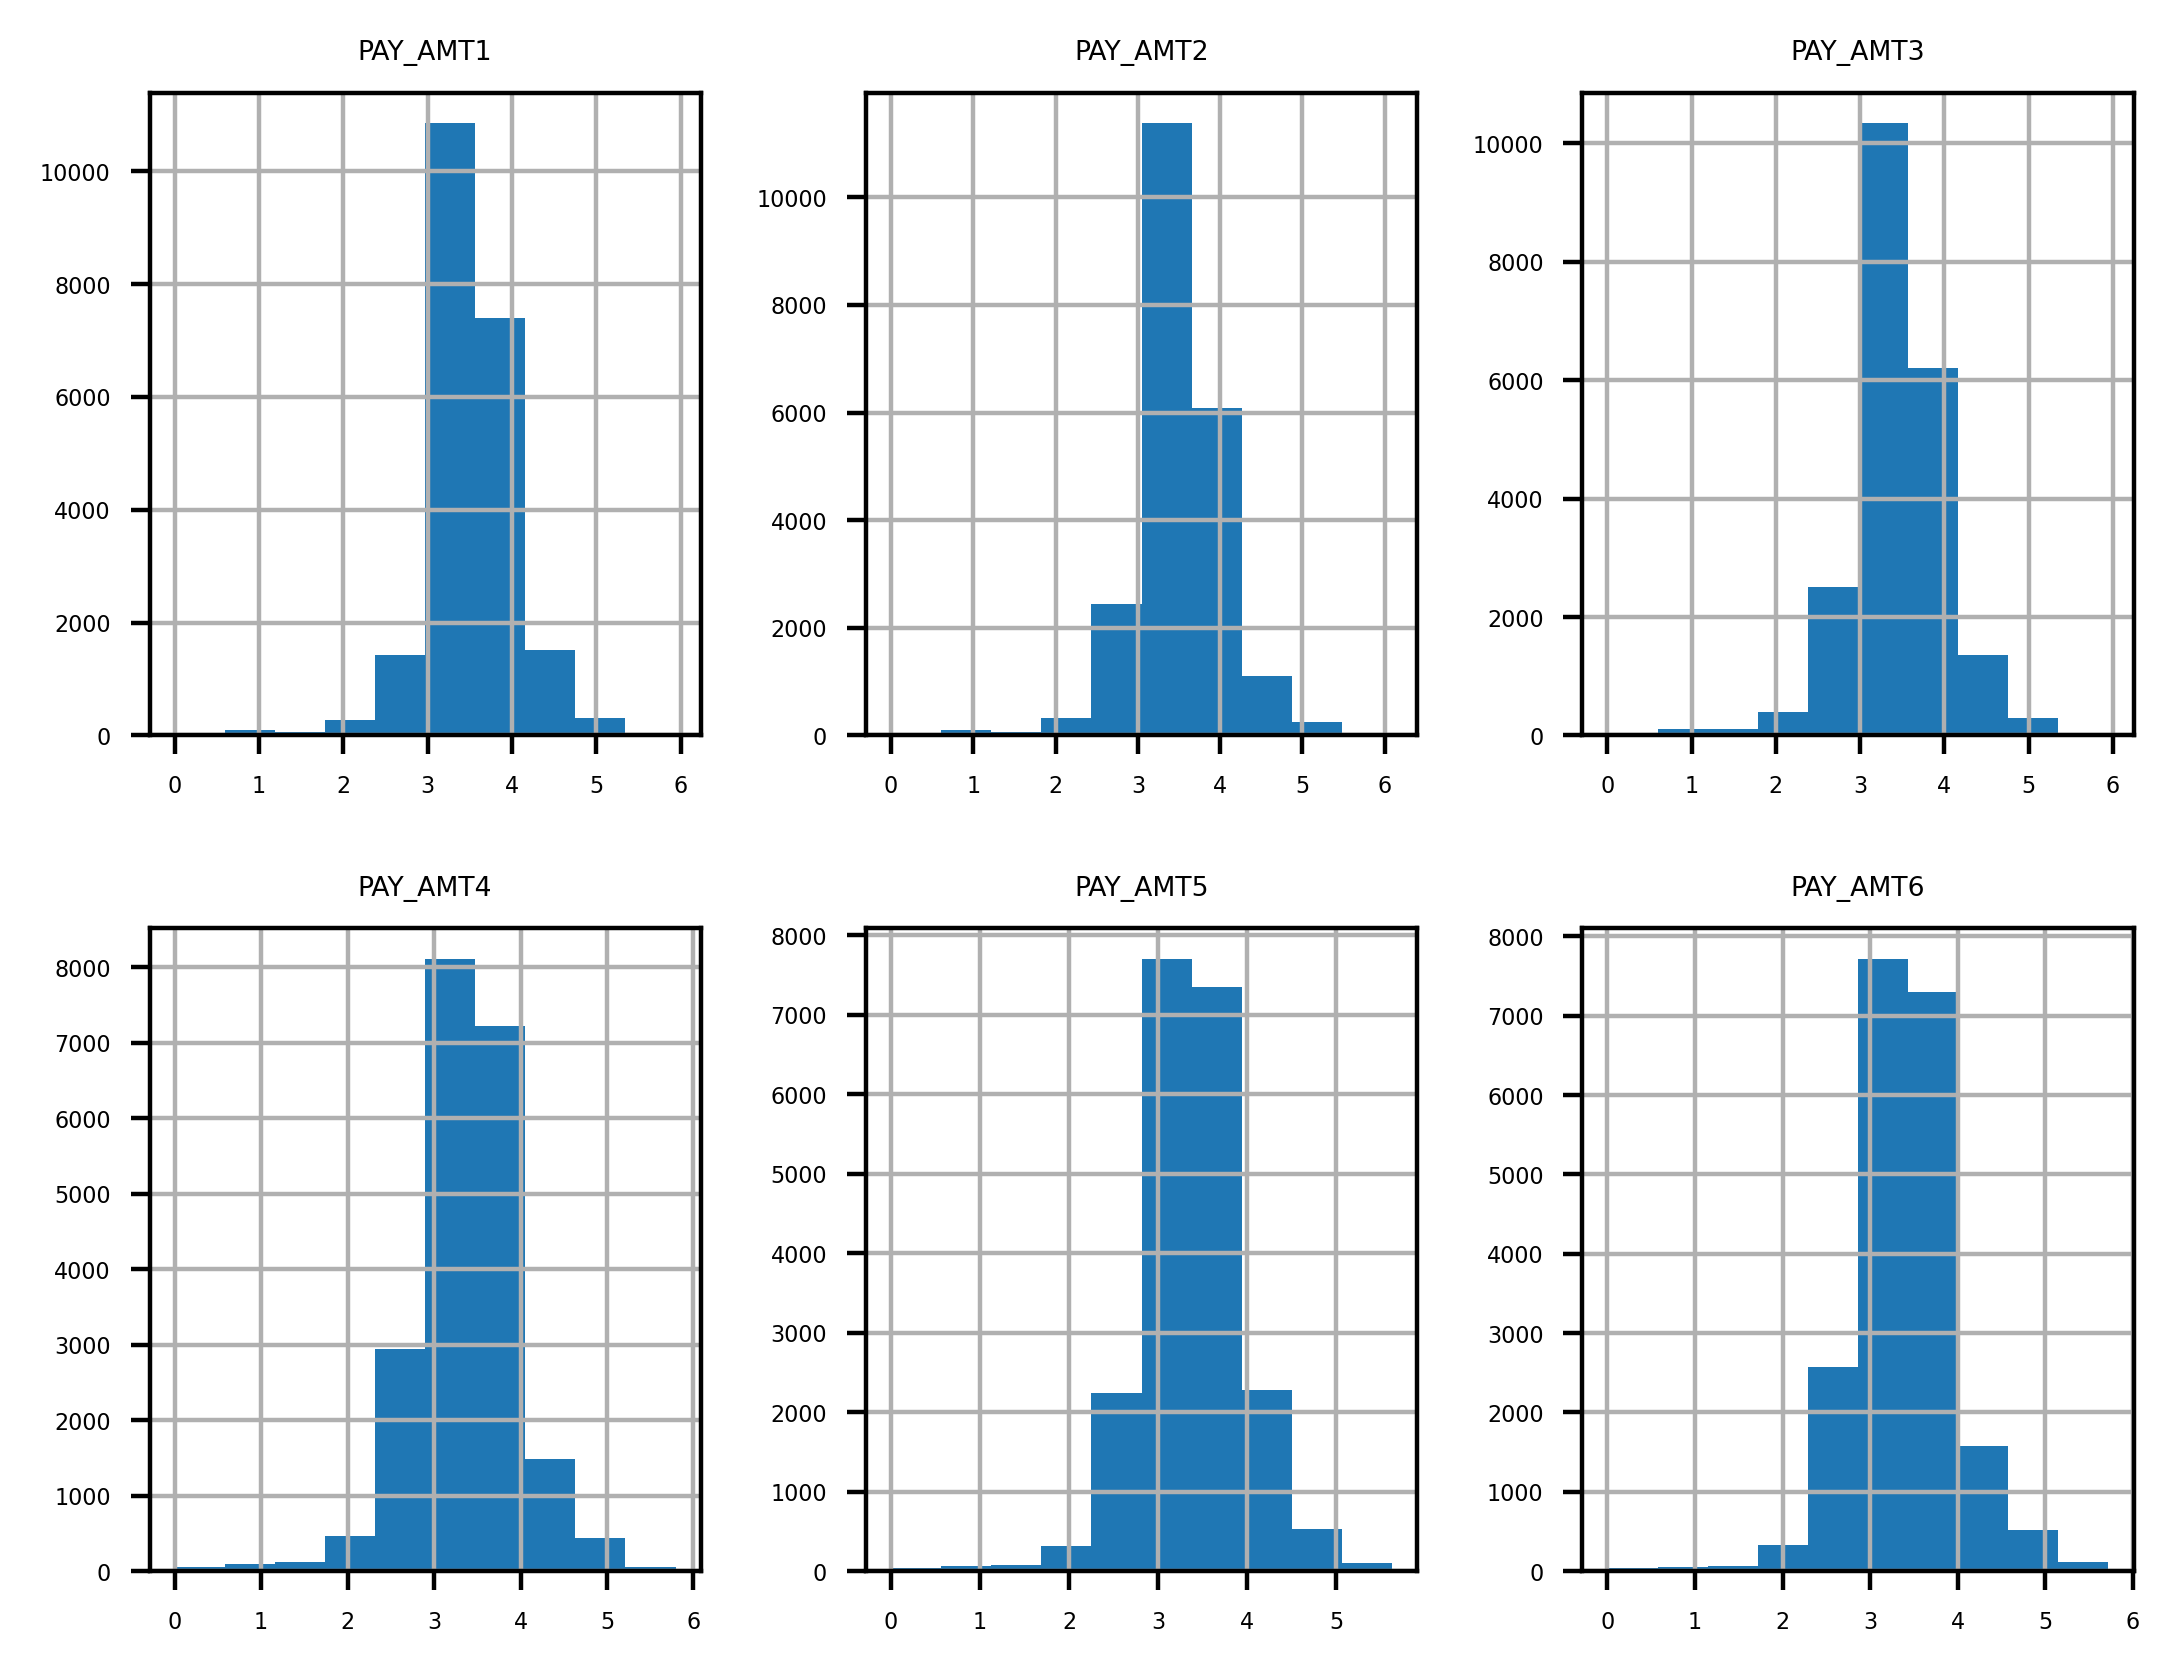

In [37]:
data[pay_amt_feats][~pay_zero_mask].apply(np.log10).hist(layout=(2, 3))

El código analiza los montos de pago de los clientes en seis periodos. Se observa que el número de clientes que no realizan pagos aumenta con el tiempo, desde 4,656 en el primer periodo hasta 6,373 en el sexto. Los histogramas, tras aplicar la transformación logarítmica, muestran que la mayoría de los clientes realizan pagos pequeños o moderados, mientras que los pagos grandes son raros y consistentes en todos los periodos.

**Conclusión:**
El comportamiento refleja una tendencia creciente en la falta de pagos y una concentración de montos pequeños entre los clientes que sí pagan, útil para segmentación y análisis financiero.

<Axes: >

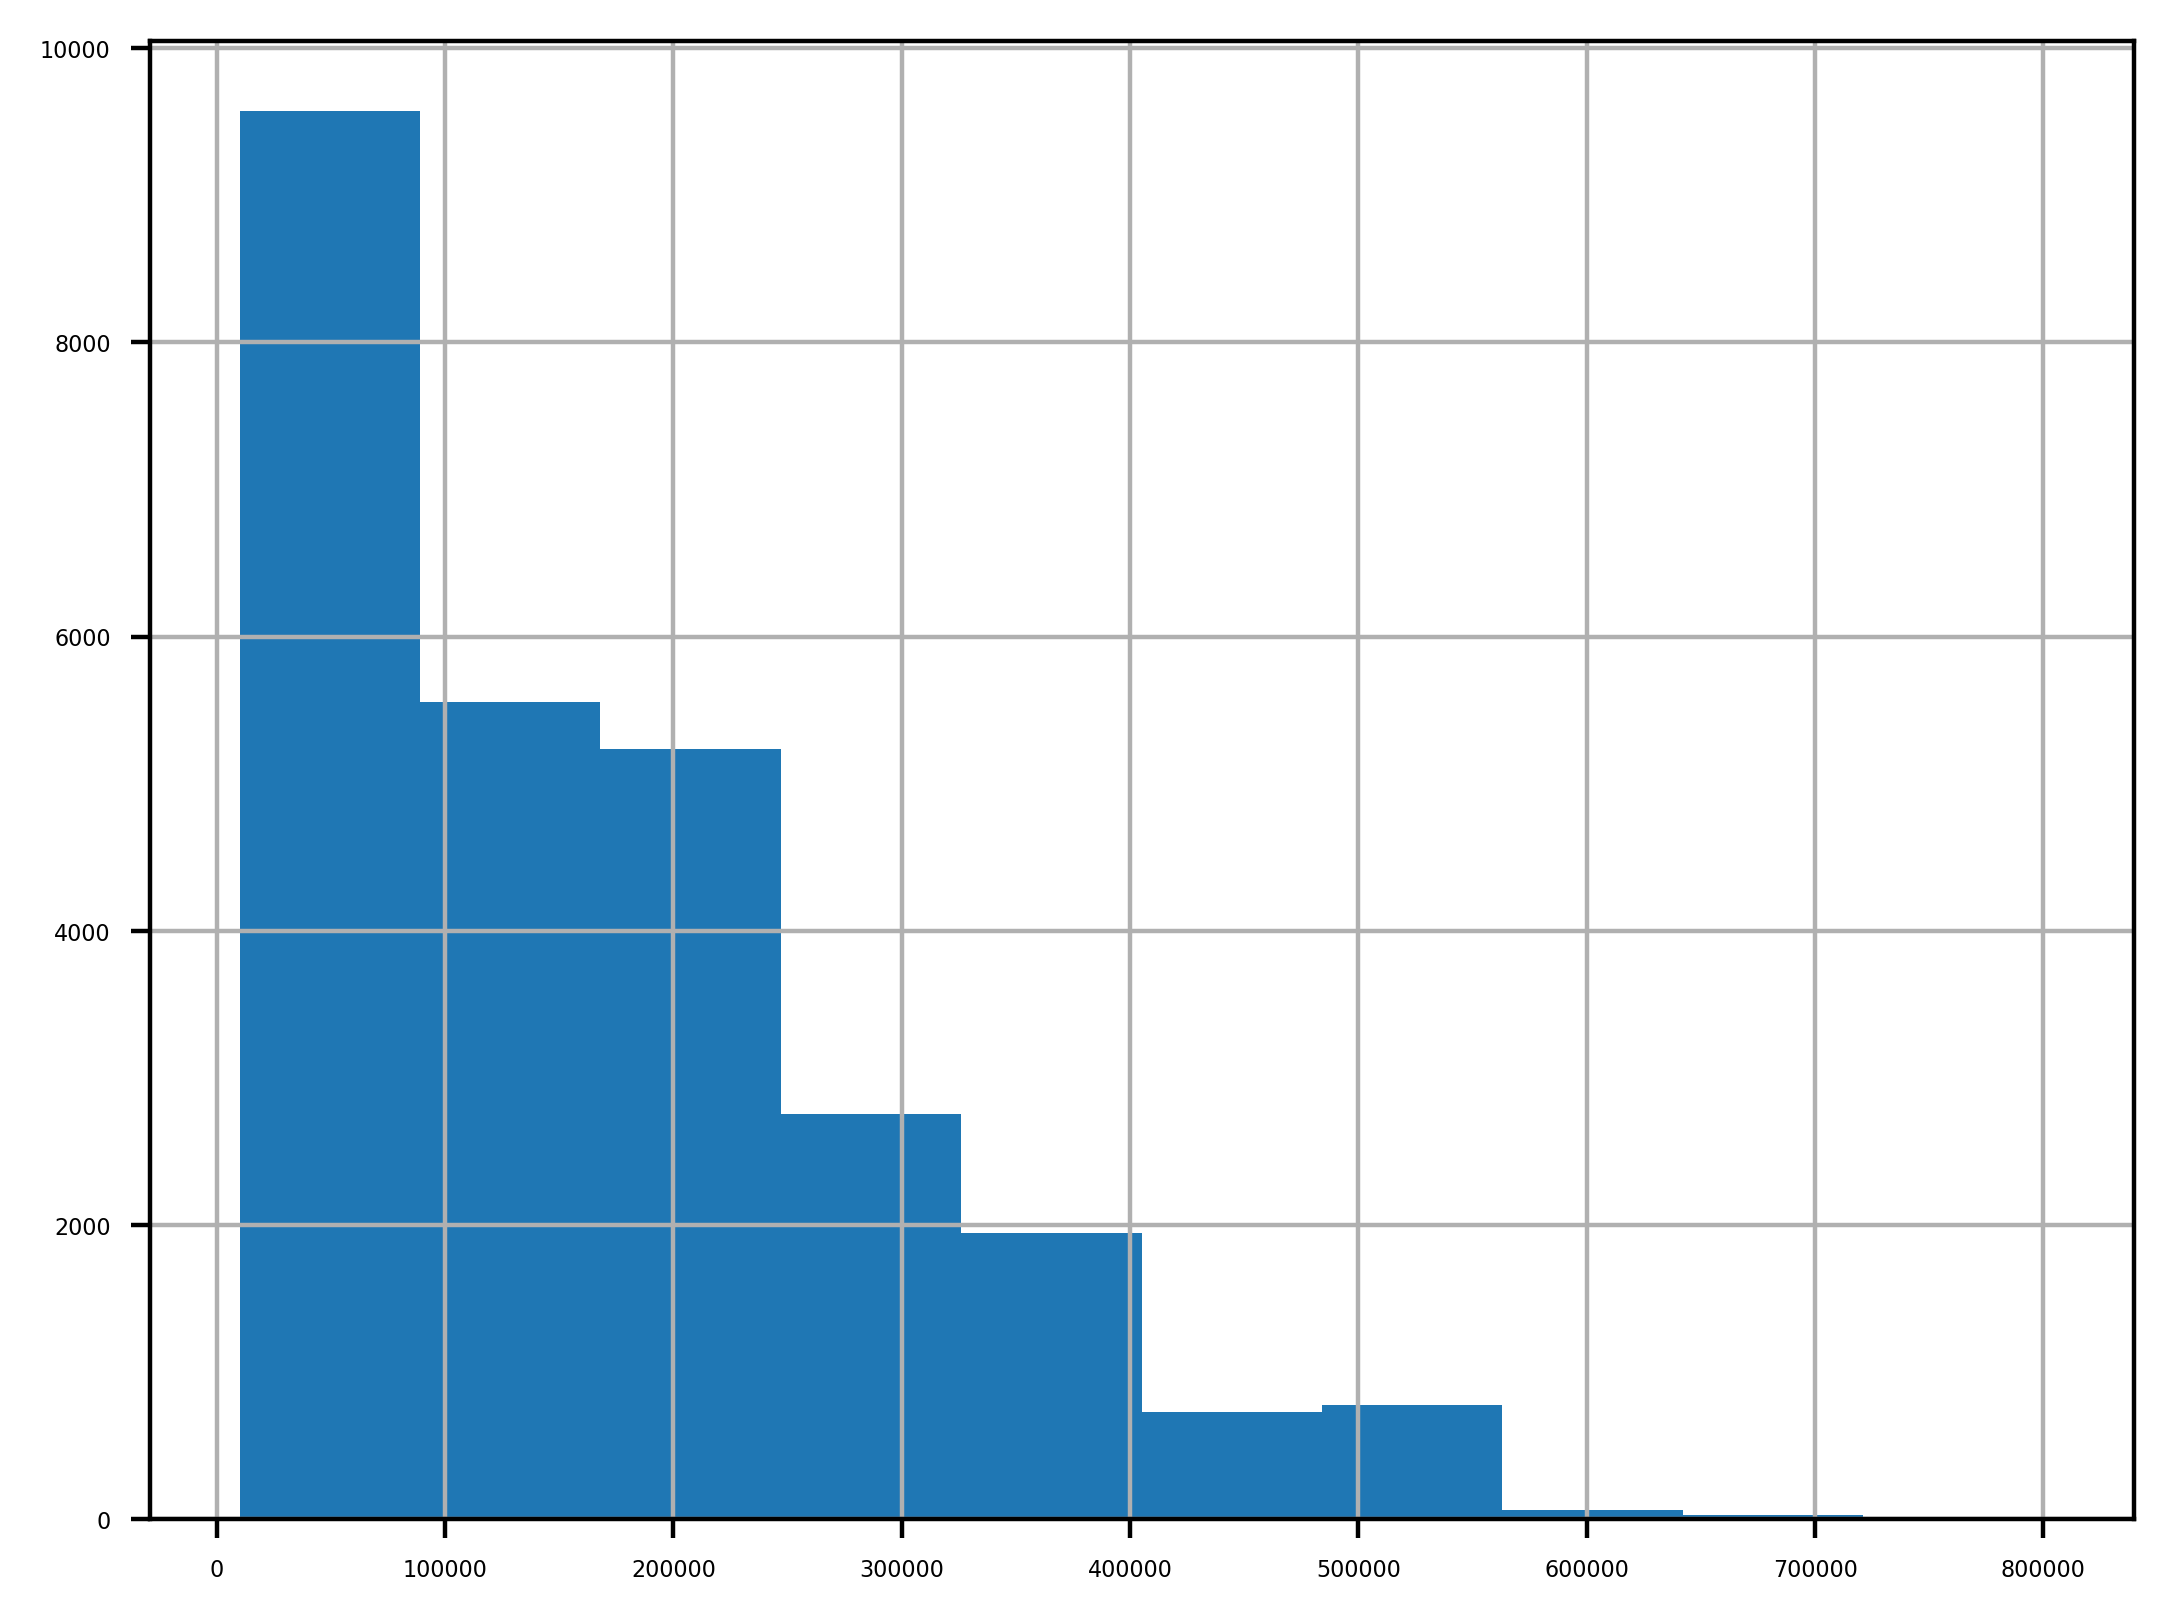

In [38]:
data['LIMIT_BAL'].hist()

La mayoría de los clientes tienen un límite de crédito bajo, y solo un pequeño número tiene límites altos. Esta información puede ser útil para entender la estructura del crédito otorgado a los clientes y para segmentar a los clientes según sus capacidades crediticias.

## Machine learning
utilizamos ML para evaluar nuestro modelo

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data[['EDUCATION', 'PAY_1', 'LIMIT_BAL']].values,
                                                   data['default payment next month'],
                                                   test_size=.2, random_state=24)

In [40]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 3)
(5333, 3)
(21331,)
(5333,)


In [41]:
data['default payment next month'].value_counts()

default payment next month
0    20750
1     5914
Name: count, dtype: int64

In [42]:
from sklearn.ensemble import RandomForestClassifier 

bosque_aleatorio = RandomForestClassifier(n_estimators = 100, random_state = 24)
bosque_aleatorio.fit(x_train, y_train)

y_pred = bosque_aleatorio.predict(x_test)

In [43]:
y_pred[:15]

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [44]:
y_test[:15]

14306    0
2978     0
16641    0
18580    1
131      0
16264    1
25422    0
26218    0
3773     1
22974    0
22001    0
12051    1
23964    0
8231     0
2090     1
Name: default payment next month, dtype: int64

In [45]:
from sklearn.metrics import accuracy_score 

accury = accuracy_score(y_test, y_pred)
accury

0.817551096943559

In [50]:
from sklearn import linear_model

logit_model = linear_model.LogisticRegression()
logit_model.fit(x_train, y_train)  # Cambiar X_train por x_train


In [52]:
y_pred = logit_model.predict(x_test)  # Cambiar X_test por x_test

In [53]:
y_pred[:15]

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [54]:
y_test[:15]

14306    0
2978     0
16641    0
18580    1
131      0
16264    1
25422    0
26218    0
3773     1
22974    0
22001    0
12051    1
23964    0
8231     0
2090     1
Name: default payment next month, dtype: int64

In [55]:
accury = accuracy_score(y_test, y_pred)
accury

0.8153009563097694

## Modelos de Machine Learning

### Entrenamiento del Modelo de Bosques Aleatorios:

Usando RandomForestClassifier, el modelo logró una precisión del 81.75%. Esta es una buena métrica inicial, aunque podrían evaluarse otras métricas como la F1-Score o AUC-ROC para medir el desempeño en un conjunto de datos desbalanceado.

### Modelo de Regresión Logística:

Este modelo alcanzó una precisión del 81,5%, ligeramente inferior al bosque aleatorio. Esto podría deberse a la naturaleza lineal del modelo, que no captura relaciones más complejas entre las variables.